## Load Dataset

In [47]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import StandardScaler


In [ ]:
# fetch dataset support2
data = fetch_ucirepo(id=880) 

# data (as pandas dataframes) 
X = data.data.features 
y = data.data.targets 

print(X.head())
print(y.head())

        age     sex            dzgroup             dzclass  num.co   edu  \
0  62.84998    male        Lung Cancer              Cancer       0  11.0   
1  60.33899  female          Cirrhosis  COPD/CHF/Cirrhosis       2  12.0   
2  52.74698  female          Cirrhosis  COPD/CHF/Cirrhosis       2  12.0   
3  42.38498  female        Lung Cancer              Cancer       2  11.0   
4  79.88495  female  ARF/MOSF w/Sepsis            ARF/MOSF       1   NaN   

       income  scoma  charges  totcst  ...      bili      crea    sod  \
0    $11-$25k    0.0   9715.0     NaN  ...  0.199982  1.199951  141.0   
1    $11-$25k   44.0  34496.0     NaN  ...       NaN  5.500000  132.0   
2  under $11k    0.0  41094.0     NaN  ...  2.199707  2.000000  134.0   
3  under $11k    0.0   3075.0     NaN  ...       NaN  0.799927  139.0   
4         NaN   26.0  50127.0     NaN  ...       NaN  0.799927  143.0   

         ph  glucose  bun  urine  adlp  adls  adlsc  
0  7.459961      NaN  NaN    NaN   7.0   7.0    7.

In [9]:
# Structure data for easier analysis
df = pd.DataFrame(X, columns=data.feature_names)

print(df.head())

        age     sex            dzgroup             dzclass  num.co   edu  \
0  62.84998    male        Lung Cancer              Cancer       0  11.0   
1  60.33899  female          Cirrhosis  COPD/CHF/Cirrhosis       2  12.0   
2  52.74698  female          Cirrhosis  COPD/CHF/Cirrhosis       2  12.0   
3  42.38498  female        Lung Cancer              Cancer       2  11.0   
4  79.88495  female  ARF/MOSF w/Sepsis            ARF/MOSF       1   NaN   

       income  scoma  charges  totcst  ...      bili      crea    sod  \
0    $11-$25k    0.0   9715.0     NaN  ...  0.199982  1.199951  141.0   
1    $11-$25k   44.0  34496.0     NaN  ...       NaN  5.500000  132.0   
2  under $11k    0.0  41094.0     NaN  ...  2.199707  2.000000  134.0   
3  under $11k    0.0   3075.0     NaN  ...       NaN  0.799927  139.0   
4         NaN   26.0  50127.0     NaN  ...       NaN  0.799927  143.0   

         ph  glucose  bun  urine  adlp  adls  adlsc  
0  7.459961      NaN  NaN    NaN   7.0   7.0    7.

In [10]:
# Basic EDA
print("Shape:", df.shape)
print(df.dtypes)

# summary statistics for numerical columns
print(df.describe())

# check for missing values
print(df.isnull().sum())

# target distribution
print(y.value_counts())

Shape: (9105, 42)
age         float64
sex          object
dzgroup      object
dzclass      object
num.co        int64
edu         float64
income       object
scoma       float64
charges     float64
totcst      float64
totmcst     float64
avtisst     float64
race         object
sps         float64
aps         float64
surv2m      float64
surv6m      float64
hday          int64
diabetes      int64
dementia      int64
ca           object
prg2m       float64
prg6m       float64
dnr          object
dnrday      float64
meanbp      float64
wblc        float64
hrt         float64
resp        float64
temp        float64
pafi        float64
alb         float64
bili        float64
crea        float64
sod         float64
ph          float64
glucose     float64
bun         float64
urine       float64
adlp        float64
adls        float64
adlsc       float64
dtype: object
               age       num.co          edu        scoma       charges  \
count  9105.000000  9105.000000  7471.000000  9104.00

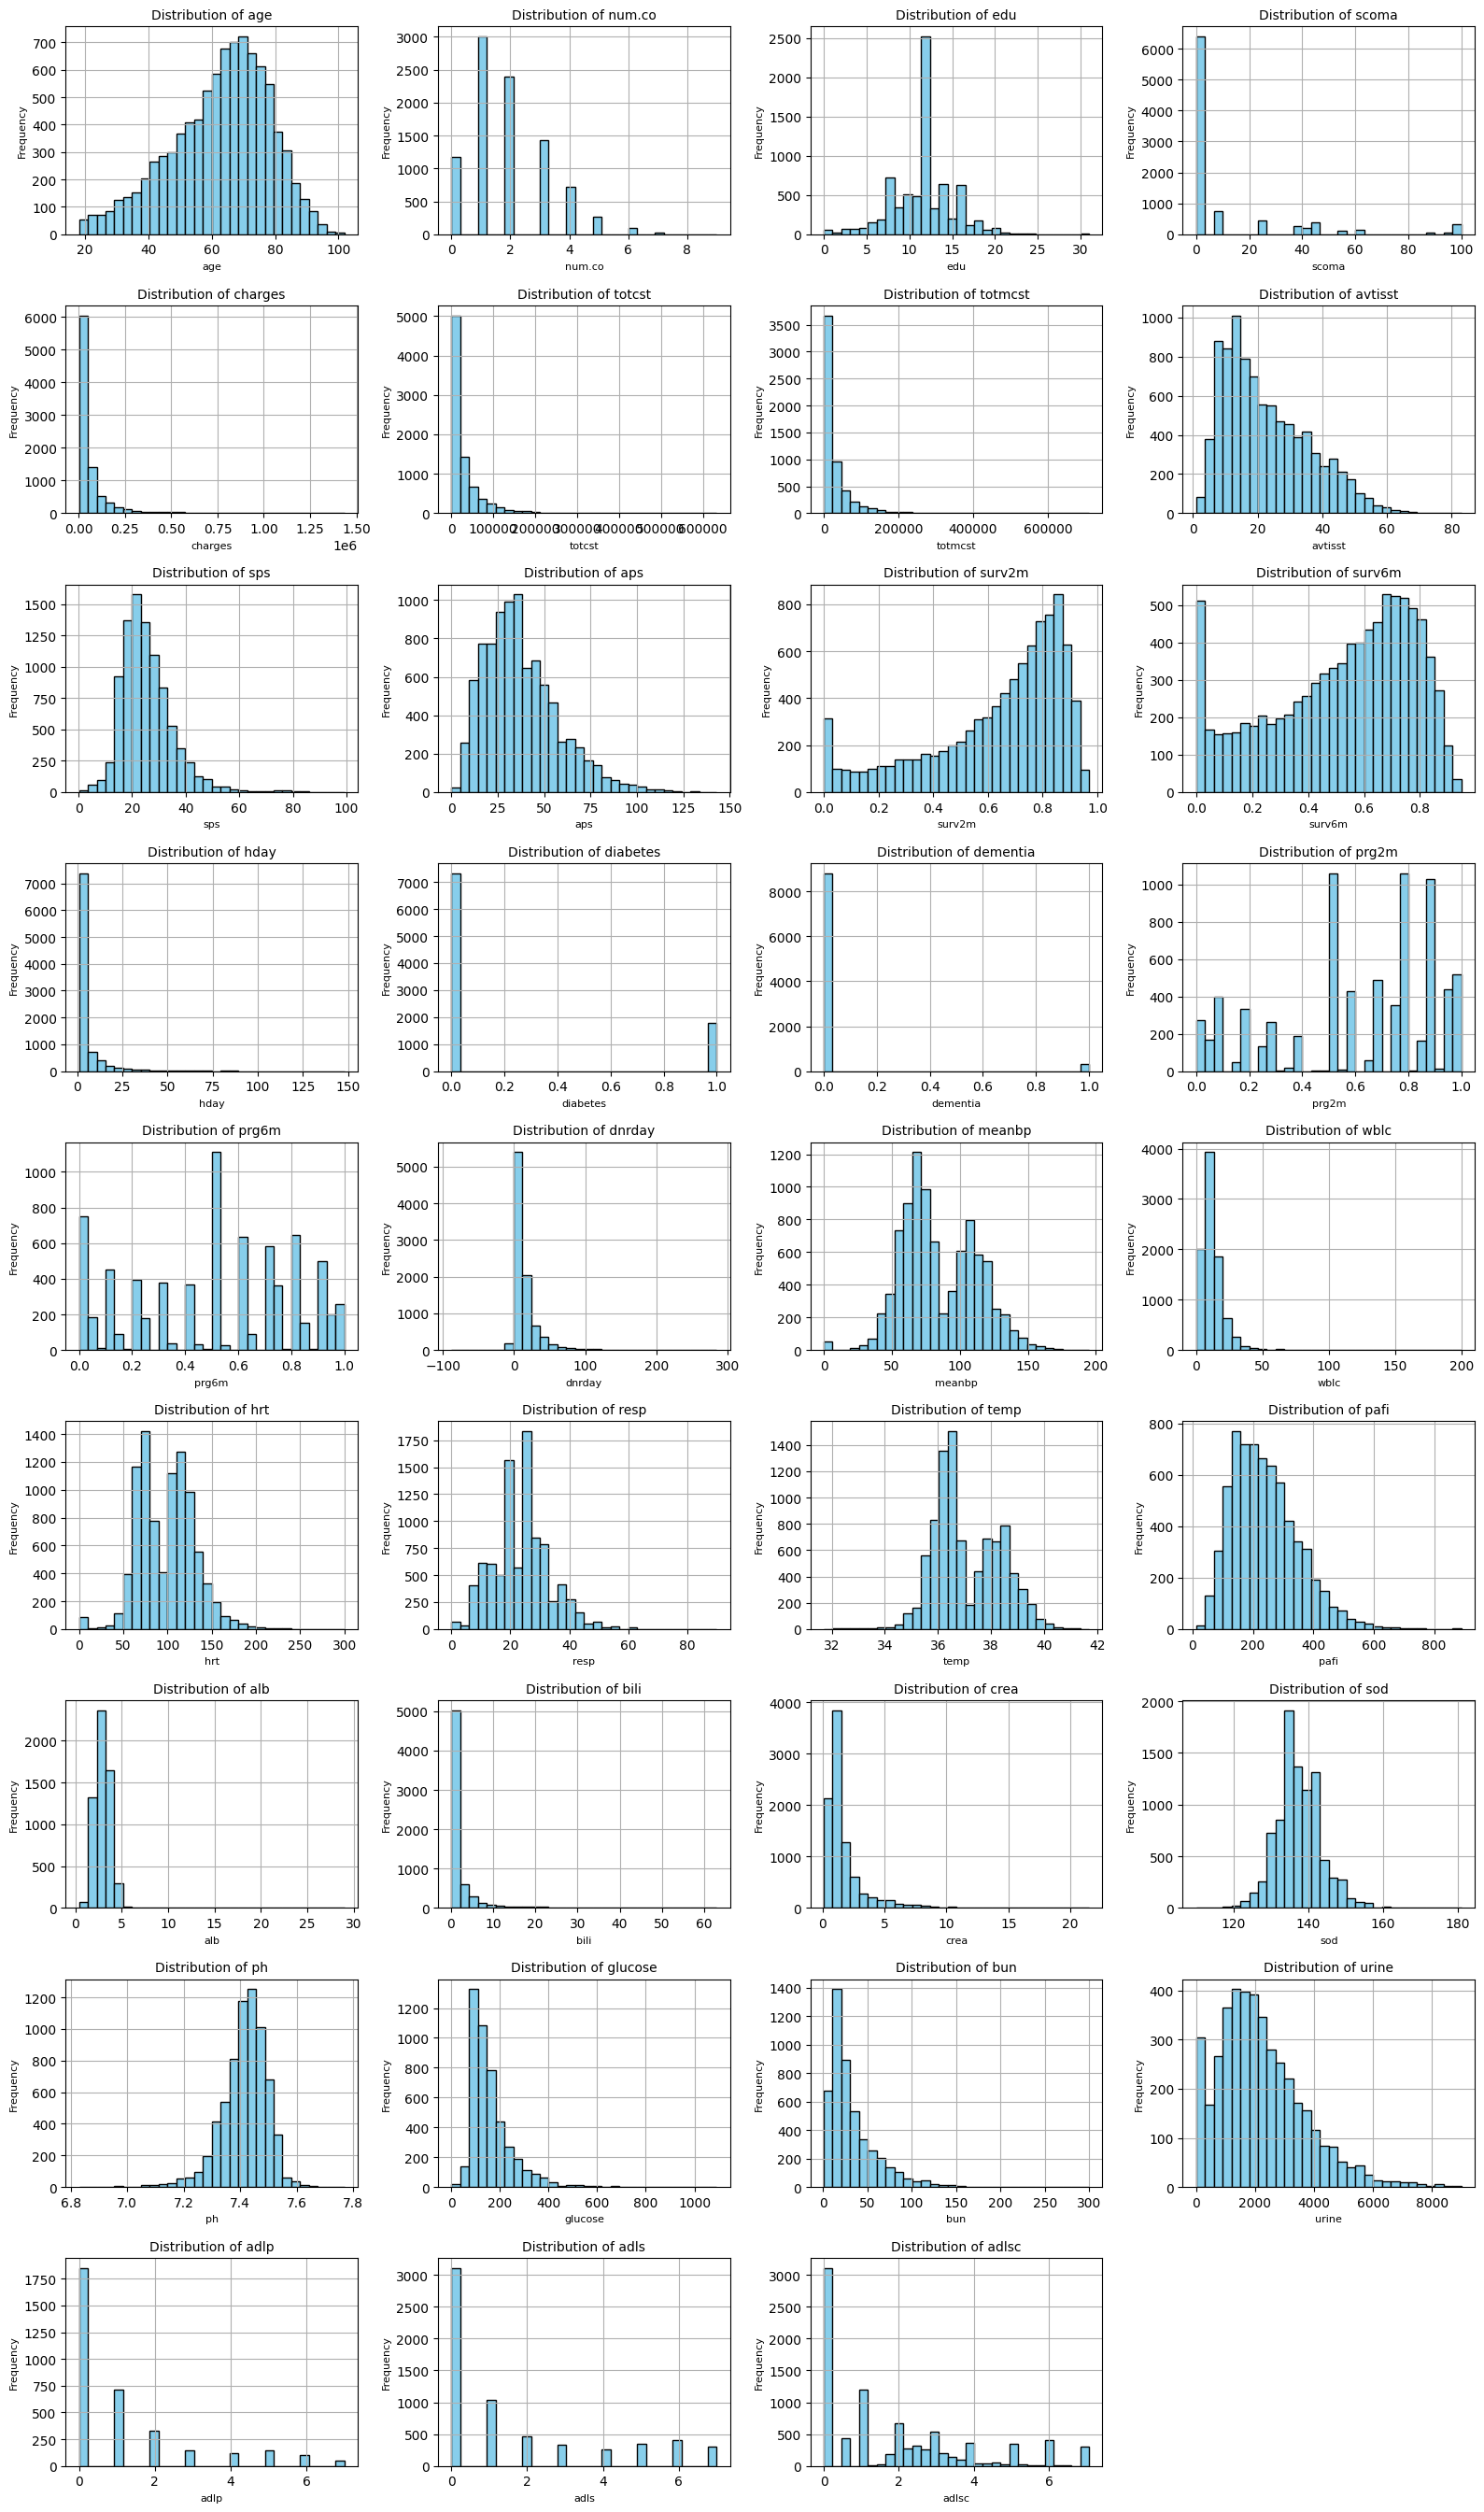

In [15]:
num_cols = len(df.select_dtypes(include='number').columns)
cols = 4  # number of columns in the grid
rows = math.ceil(num_cols / cols)  # calculate rows needed

fig = plt.figure(figsize=(cols * 4, rows * 3))

for i, column in enumerate(df.select_dtypes(include='number').columns, 1):
    ax = fig.add_subplot(rows, cols, i)
    df[column].hist(ax=ax, bins=30, color='skyblue', edgecolor='black')
    ax.set_title(f'Distribution of {column}', fontsize=10)
    ax.set_xlabel(column, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

plt.tight_layout()
plt.show()

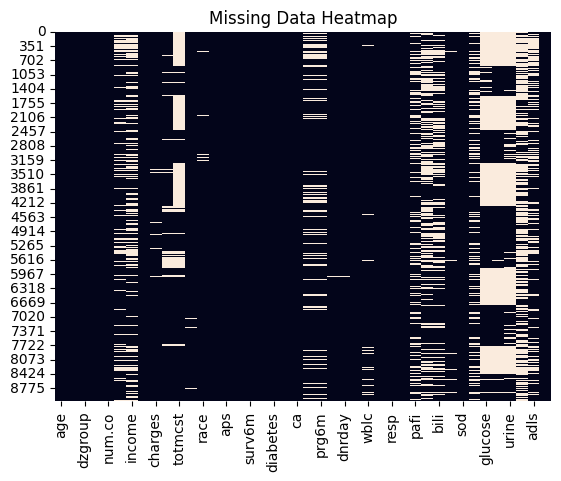

In [21]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

In [23]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print("Categorical columns based on dtype:", cat_cols)

# Check number of unique values per column
for col in cat_cols:
    unique_vals = df[col].nunique()
    print(f"{col}: {unique_vals} unique values")

Categorical columns based on dtype: ['sex', 'dzgroup', 'dzclass', 'income', 'race', 'ca', 'dnr']
sex: 2 unique values
dzgroup: 8 unique values
dzclass: 4 unique values
income: 4 unique values
race: 5 unique values
ca: 3 unique values
dnr: 3 unique values


In [ ]:
# Perform One-Hot encoding
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

print(df_encoded.head())

        age  num.co   edu  scoma  charges  totcst  totmcst    avtisst  \
0  62.84998       0  11.0    0.0   9715.0     NaN      NaN   7.000000   
1  60.33899       2  12.0   44.0  34496.0     NaN      NaN  29.000000   
2  52.74698       2  12.0    0.0  41094.0     NaN      NaN  13.000000   
3  42.38498       2  11.0    0.0   3075.0     NaN      NaN   7.000000   
4  79.88495       1   NaN   26.0  50127.0     NaN      NaN  18.666656   

         sps   aps  ...  income_>$50k  income_under $11k  race_black  \
0  33.898438  20.0  ...         False              False       False   
1  52.695312  74.0  ...         False              False       False   
2  20.500000  45.0  ...         False               True       False   
3  20.097656  19.0  ...         False               True       False   
4  23.500000  30.0  ...         False              False       False   

   race_hispanic  race_other  race_white  ca_no  ca_yes  dnr_dnr before sadm  \
0          False        True       False  False 

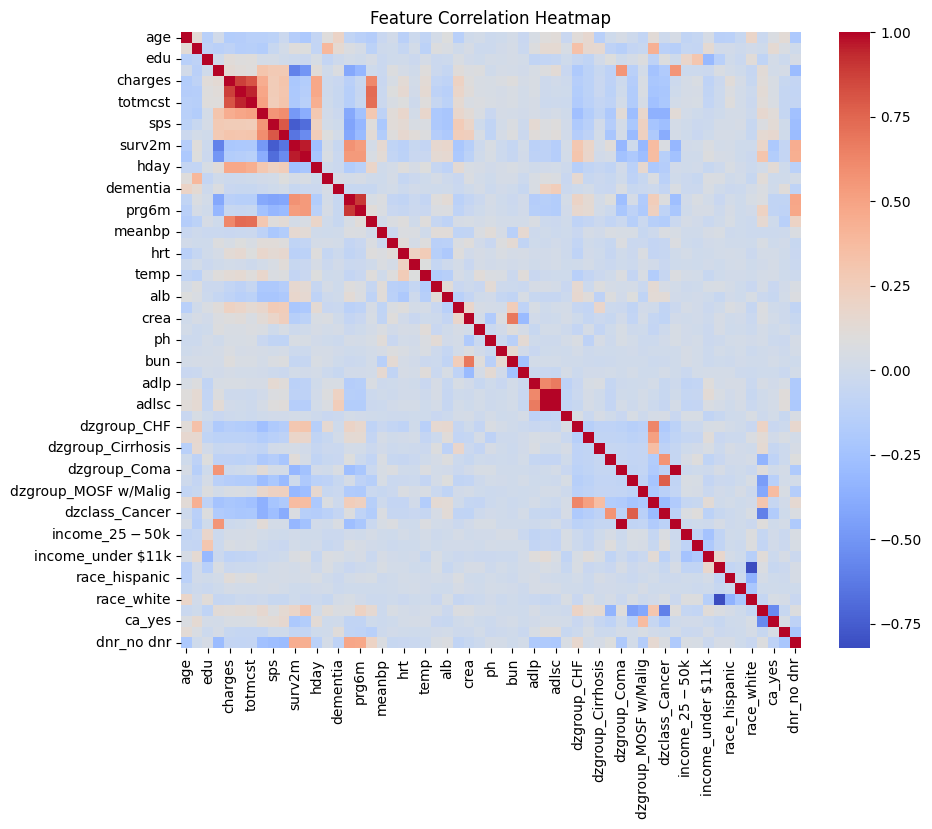

In [34]:
plt.figure(figsize=(10,8))
sns.heatmap(df_encoded.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [40]:
bools_col = df_encoded.select_dtypes(include='bool').columns
df_encoded[bools_col] = df_encoded[bools_col].astype(int)

In [43]:
total_rows = df_encoded.shape[0]
remaining_rows = df_encoded.dropna().shape[0]
percent_remaining = (remaining_rows / total_rows) * 100

print(f"Rows remaining after dropping NaNs: {remaining_rows} of {total_rows} ({percent_remaining:.2f}%)")

Rows remaining after dropping NaNs: 405 of 9105 (4.45%)


In [45]:
# Drop columns with more than 80% missing values
missing_threshold = 0.8
df_encoded_dropNA = df_encoded.loc[:, df_encoded.isnull().mean() < missing_threshold]


In [48]:
# create cleaned dataset all columns should be numeric col
numeric_cols = df_encoded_dropNA.select_dtypes(include='number').columns
df_cleaned = df_encoded_dropNA[numeric_cols]

# scale before imputation
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(
    scaler.fit_transform(df_cleaned),
    columns=numeric_cols
)

# apply Iterative Imputer
imputer = IterativeImputer(random_state=42)
df_clean = pd.DataFrame(
    imputer.fit_transform(df_numeric_scaled),
    columns=numeric_cols
)

# recommend to scale again after imputation prior to modeling for linear 

/usr/local/lib/python3.11/site-packages/sklearn/impute/_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [51]:
# deal with multicolinearity

df_clean_const = add_constant(df_clean)

# Compute VIF
vif_df = pd.DataFrame()
vif_df["feature"] = df_clean_const.columns
vif_df["VIF"] = [variance_inflation_factor(df_clean_const.values, i) for i in range(df_clean_const.shape[1])]

/usr/local/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


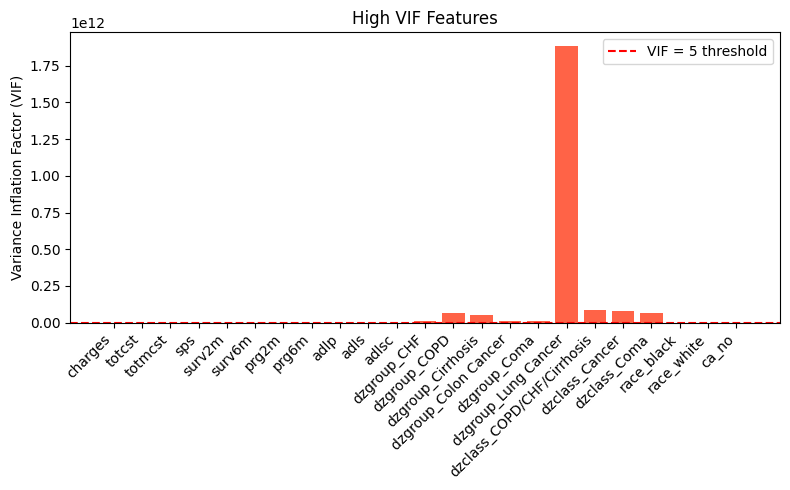

In [53]:
threshold = 5

# Filter the dataframe for VIF > threshold and exclude the constant/intercept if present
high_vif_df = vif_df[(vif_df['VIF'] > threshold) & (vif_df['feature'] != 'const')]

plt.figure(figsize=(8, 5))
plt.bar(high_vif_df['feature'], high_vif_df['VIF'], color='tomato')
plt.xticks(rotation=45, ha='right')
plt.axhline(y=threshold, color='red', linestyle='--', label=f'VIF = {threshold} threshold')
plt.ylabel('Variance Inflation Factor (VIF)')
plt.title('High VIF Features')
plt.legend()
plt.tight_layout()
plt.show()

In [58]:
df_clean['death'] = y['death']
df_clean['hospdead'] = y['hospdead']

df_clean.to_parquet('../data/cleaned_output.parquet') 